## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  20.599477  1492.930587  0.933052   2.936493  1393.223430
1  53.354681  1658.290616  0.723307   9.257067  1200.470547
2  11.629240  1409.113613  0.143054  10.165022   202.026165
3  76.935389   478.744116  0.249266  10.037627   142.160259
4  20.443364   283.453892  0.336260  10.212444    97.413613


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9483951	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9369080	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9285255	total: 58.8ms	remaining: 19.5s
3:	learn: 0.9185017	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9067808	total: 59.7ms	remaining: 11.9s
5:	learn: 0.8956587	total: 60.2ms	remaining: 9.97s
6:	learn: 0.8836905	total: 60.6ms	remaining: 8.6s
7:	learn: 0.8717800	total: 61.2ms	remaining: 7.59s
8:	learn: 0.8603680	total: 61.6ms	remaining: 6.79s
9:	learn: 0.8486423	total: 62.1ms	remaining: 6.15s
10:	learn: 0.8396256	total: 62.9ms	remaining: 5.66s
11:	learn: 0.8260708	total: 63.5ms	remaining: 5.23s
12:	learn: 0.8150783	total: 64.1ms	remaining: 4.87s
13:	learn: 0.8038407	total: 64.7ms	remaining: 4.56s
14:	learn: 0.7944456	total: 65.3ms	remaining: 4.29s
15:	learn: 0.7851362	total: 65.8ms	remaining: 4.05s
16:	learn: 0.7744916	total: 66.2ms	remaining: 3.83s
17:	learn: 0.7654400	total: 66.8ms	remaining: 3.64s
18:	learn: 0.7579382	total: 68.2ms	remaining:

90:	learn: 0.3298225	total: 102ms	remaining: 1.02s
91:	learn: 0.3267513	total: 103ms	remaining: 1.01s
92:	learn: 0.3235834	total: 103ms	remaining: 1.01s
93:	learn: 0.3197972	total: 104ms	remaining: 998ms
94:	learn: 0.3163265	total: 104ms	remaining: 989ms
95:	learn: 0.3133842	total: 104ms	remaining: 982ms
96:	learn: 0.3099451	total: 105ms	remaining: 973ms
97:	learn: 0.3061438	total: 105ms	remaining: 967ms
98:	learn: 0.3034118	total: 106ms	remaining: 961ms
99:	learn: 0.2995300	total: 106ms	remaining: 954ms
100:	learn: 0.2954942	total: 106ms	remaining: 948ms
101:	learn: 0.2921352	total: 107ms	remaining: 941ms
102:	learn: 0.2898950	total: 107ms	remaining: 934ms
103:	learn: 0.2865025	total: 108ms	remaining: 928ms
104:	learn: 0.2840878	total: 108ms	remaining: 922ms
105:	learn: 0.2809687	total: 109ms	remaining: 916ms
106:	learn: 0.2776016	total: 109ms	remaining: 911ms
107:	learn: 0.2743762	total: 110ms	remaining: 906ms
108:	learn: 0.2712479	total: 110ms	remaining: 901ms
109:	learn: 0.2687020	

261:	learn: 0.0683674	total: 184ms	remaining: 519ms
262:	learn: 0.0678358	total: 185ms	remaining: 518ms
263:	learn: 0.0673376	total: 185ms	remaining: 517ms
264:	learn: 0.0667534	total: 186ms	remaining: 515ms
265:	learn: 0.0663596	total: 186ms	remaining: 513ms
266:	learn: 0.0659583	total: 186ms	remaining: 512ms
267:	learn: 0.0653782	total: 187ms	remaining: 510ms
268:	learn: 0.0648683	total: 187ms	remaining: 508ms
269:	learn: 0.0644193	total: 188ms	remaining: 507ms
270:	learn: 0.0640610	total: 188ms	remaining: 506ms
271:	learn: 0.0636184	total: 188ms	remaining: 504ms
272:	learn: 0.0632514	total: 189ms	remaining: 503ms
273:	learn: 0.0627196	total: 189ms	remaining: 501ms
274:	learn: 0.0622984	total: 190ms	remaining: 500ms
275:	learn: 0.0618702	total: 190ms	remaining: 499ms
276:	learn: 0.0615642	total: 191ms	remaining: 498ms
277:	learn: 0.0611610	total: 191ms	remaining: 497ms
278:	learn: 0.0607409	total: 192ms	remaining: 495ms
279:	learn: 0.0603182	total: 192ms	remaining: 493ms
280:	learn: 

485:	learn: 0.0211037	total: 282ms	remaining: 299ms
486:	learn: 0.0209886	total: 283ms	remaining: 298ms
487:	learn: 0.0208590	total: 283ms	remaining: 297ms
488:	learn: 0.0207718	total: 284ms	remaining: 296ms
489:	learn: 0.0206598	total: 284ms	remaining: 296ms
490:	learn: 0.0205786	total: 285ms	remaining: 295ms
491:	learn: 0.0204692	total: 285ms	remaining: 294ms
492:	learn: 0.0203617	total: 285ms	remaining: 294ms
493:	learn: 0.0202399	total: 286ms	remaining: 293ms
494:	learn: 0.0201350	total: 286ms	remaining: 292ms
495:	learn: 0.0200619	total: 287ms	remaining: 291ms
496:	learn: 0.0199506	total: 287ms	remaining: 291ms
497:	learn: 0.0198801	total: 288ms	remaining: 290ms
498:	learn: 0.0197798	total: 288ms	remaining: 289ms
499:	learn: 0.0196758	total: 289ms	remaining: 289ms
500:	learn: 0.0195615	total: 289ms	remaining: 288ms
501:	learn: 0.0195081	total: 290ms	remaining: 287ms
502:	learn: 0.0194413	total: 290ms	remaining: 287ms
503:	learn: 0.0193761	total: 290ms	remaining: 286ms
504:	learn: 

649:	learn: 0.0117475	total: 364ms	remaining: 196ms
650:	learn: 0.0116909	total: 366ms	remaining: 196ms
651:	learn: 0.0116504	total: 366ms	remaining: 195ms
652:	learn: 0.0115968	total: 367ms	remaining: 195ms
653:	learn: 0.0115605	total: 367ms	remaining: 194ms
654:	learn: 0.0115069	total: 368ms	remaining: 194ms
655:	learn: 0.0114700	total: 369ms	remaining: 193ms
656:	learn: 0.0114069	total: 370ms	remaining: 193ms
657:	learn: 0.0113708	total: 370ms	remaining: 192ms
658:	learn: 0.0113486	total: 370ms	remaining: 192ms
659:	learn: 0.0112967	total: 371ms	remaining: 191ms
660:	learn: 0.0112617	total: 372ms	remaining: 191ms
661:	learn: 0.0112105	total: 372ms	remaining: 190ms
662:	learn: 0.0111763	total: 372ms	remaining: 189ms
663:	learn: 0.0111422	total: 373ms	remaining: 189ms
664:	learn: 0.0110918	total: 373ms	remaining: 188ms
665:	learn: 0.0110707	total: 374ms	remaining: 187ms
666:	learn: 0.0110500	total: 374ms	remaining: 187ms
667:	learn: 0.0110048	total: 375ms	remaining: 186ms
668:	learn: 

848:	learn: 0.0061135	total: 460ms	remaining: 81.9ms
849:	learn: 0.0060986	total: 461ms	remaining: 81.3ms
850:	learn: 0.0060842	total: 461ms	remaining: 80.8ms
851:	learn: 0.0060739	total: 462ms	remaining: 80.2ms
852:	learn: 0.0060547	total: 462ms	remaining: 79.6ms
853:	learn: 0.0060406	total: 462ms	remaining: 79.1ms
854:	learn: 0.0060216	total: 463ms	remaining: 78.5ms
855:	learn: 0.0060030	total: 463ms	remaining: 77.9ms
856:	learn: 0.0059878	total: 464ms	remaining: 77.3ms
857:	learn: 0.0059680	total: 464ms	remaining: 76.8ms
858:	learn: 0.0059559	total: 465ms	remaining: 76.3ms
859:	learn: 0.0059376	total: 465ms	remaining: 75.7ms
860:	learn: 0.0059228	total: 466ms	remaining: 75.2ms
861:	learn: 0.0059035	total: 466ms	remaining: 74.6ms
862:	learn: 0.0058916	total: 466ms	remaining: 74ms
863:	learn: 0.0058727	total: 467ms	remaining: 73.5ms
864:	learn: 0.0058541	total: 467ms	remaining: 72.9ms
865:	learn: 0.0058423	total: 468ms	remaining: 72.4ms
866:	learn: 0.0058241	total: 468ms	remaining: 71

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

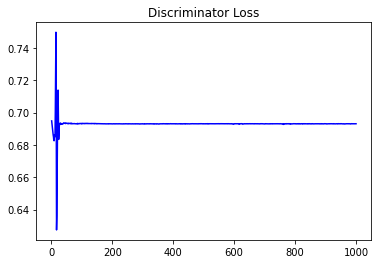

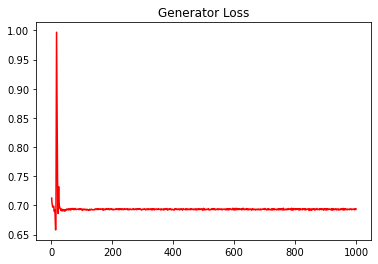

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.031363988797195375


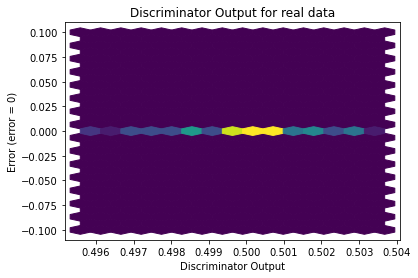

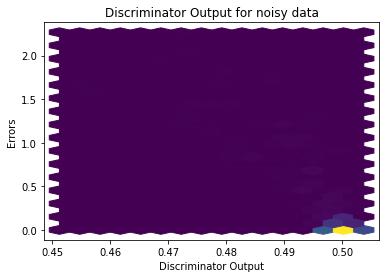

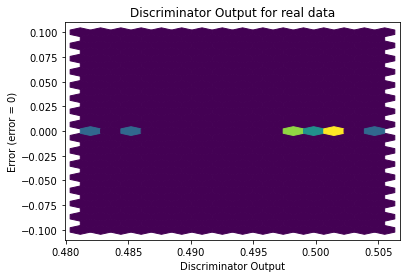

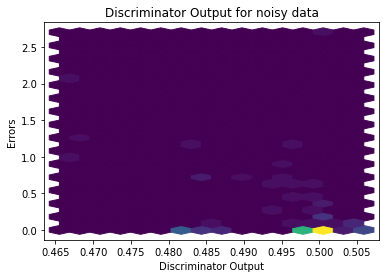

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


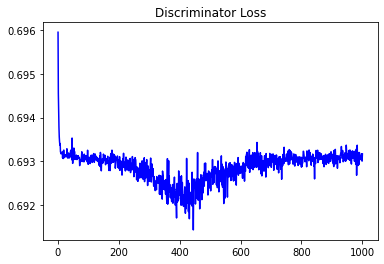

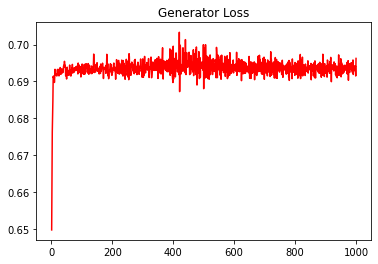

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.034360741906462496


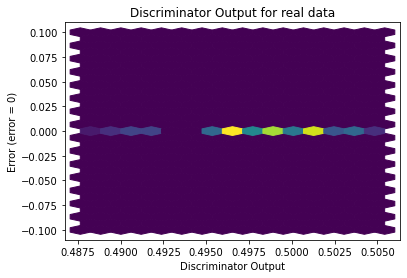

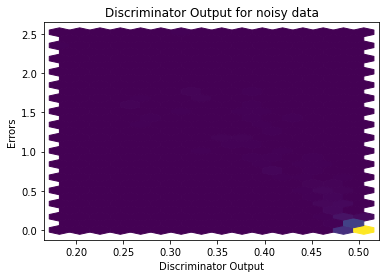

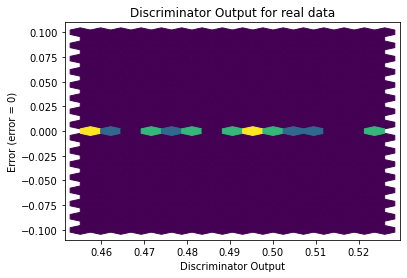

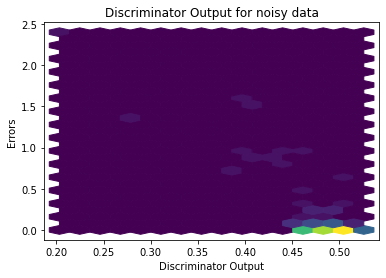

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1656]], requires_grad=True)
